In [1]:
import os  
import torch  
import torch.nn as nn  
import torch.optim as optim  
from torchvision import  transforms, models  
from torch.utils.data import DataLoader  
from sklearn.metrics import classification_report, confusion_matrix  
import matplotlib.pyplot as plt  
import seaborn as sns 
import numpy as np  


In [7]:
if  torch.cuda.is_available():
    print("GPU is available!")
    #print("Device Name:", torch.cuda.get_device_name(0))
    print("Number of GPUs:", torch.cuda.device_count())

GPU is available!
Device Name: NVIDIA GeForce RTX 3060 Laptop GPU
Number of GPUs: 1


In [9]:
alldatasets=os.listdir(r"C:\Users\yigit\Downloads\archive(16)\chest_xray")

train_data=r"C:\Users\yigit\Downloads\archive(16)\chest_xray\train"
val_data=r"C:\Users\yigit\Downloads\archive(16)\chest_xray\val"
test_data=r"C:\Users\yigit\Downloads\archive(16)\chest_xray\test"


 Normal  (3 samples):


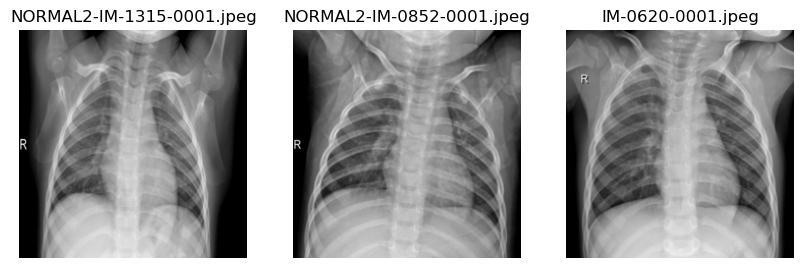


Bacterial Pneumonia  (3 samples):


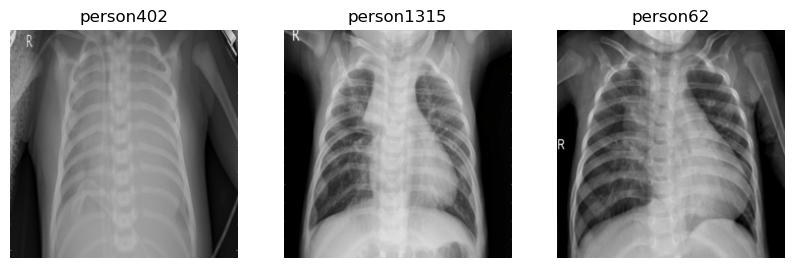


 Viral Pneumonia  (3 samples):


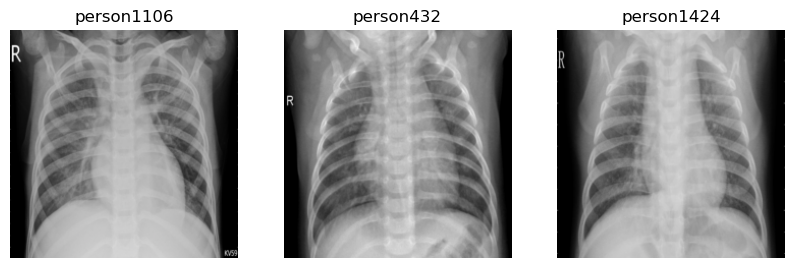

In [53]:


transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


train_dataset = datasets.ImageFolder(train_data, transform=transform)


def show_class_images(dataset, class_name, num_images=3):
    
    class_idx = dataset.class_to_idx[class_name]
    class_images = [sample for sample in dataset.samples if sample[1] == class_idx]
    
    
    if class_name == 'PNEUMONIA':
        bacterial_images = [img for img in class_images if 'bacteria' in img[0]]
        viral_images = [img for img in class_images if 'virus' in img[0]]
        
       
        print(f"\nBacterial Pneumonia  ({num_images} samples):")
        show_images(bacterial_images, dataset, num_images)
        
       
        print(f"\n Viral Pneumonia  ({num_images} samples):")
        show_images(viral_images, dataset, num_images)
    else:
        
        print(f"\n Normal  ({num_images} samples):")
        show_images(class_images, dataset, num_images)


def show_images(image_paths, dataset, num_images=3):
    plt.figure(figsize=(10, 10))
    random.shuffle(image_paths)  
    for i, (img_path, _) in enumerate(image_paths[:num_images]):
        img = dataset.loader(img_path)
        img = transform(img).numpy().transpose((1, 2, 0))  
        img = np.clip(img * [0.229, 0.224, 0.225] + [0.485, 0.456, 0.406], 0, 1) 
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.title(os.path.basename(img_path).split('_')[0])  
        plt.axis("off")
    plt.show()


show_class_images(train_dataset, 'NORMAL', num_images=3)
show_class_images(train_dataset, 'PNEUMONIA', num_images=3)



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Validation Dataset:


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


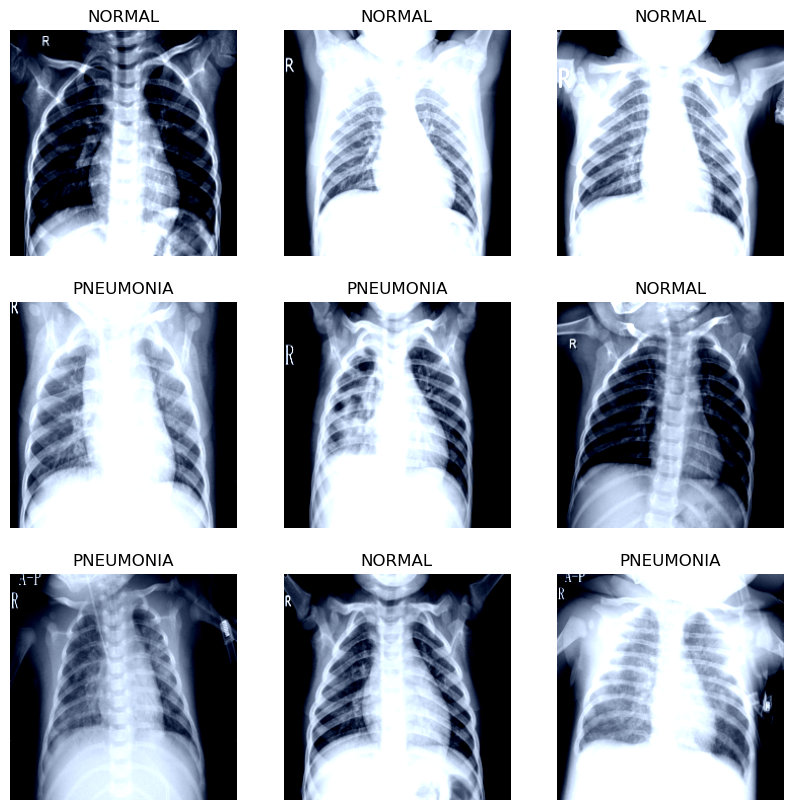


Bacterial Pneumonia  (3 samples):


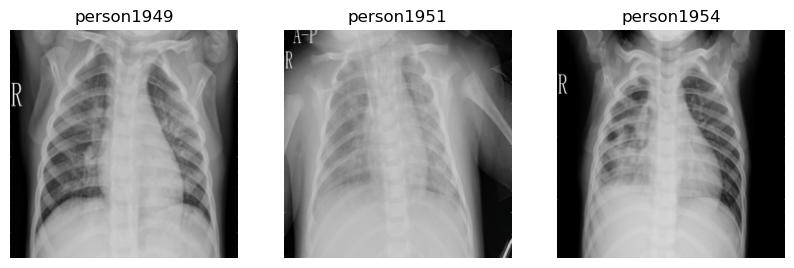


 Viral Pneumonia  (3 samples):


<Figure size 1000x1000 with 0 Axes>

Test Dataset:


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


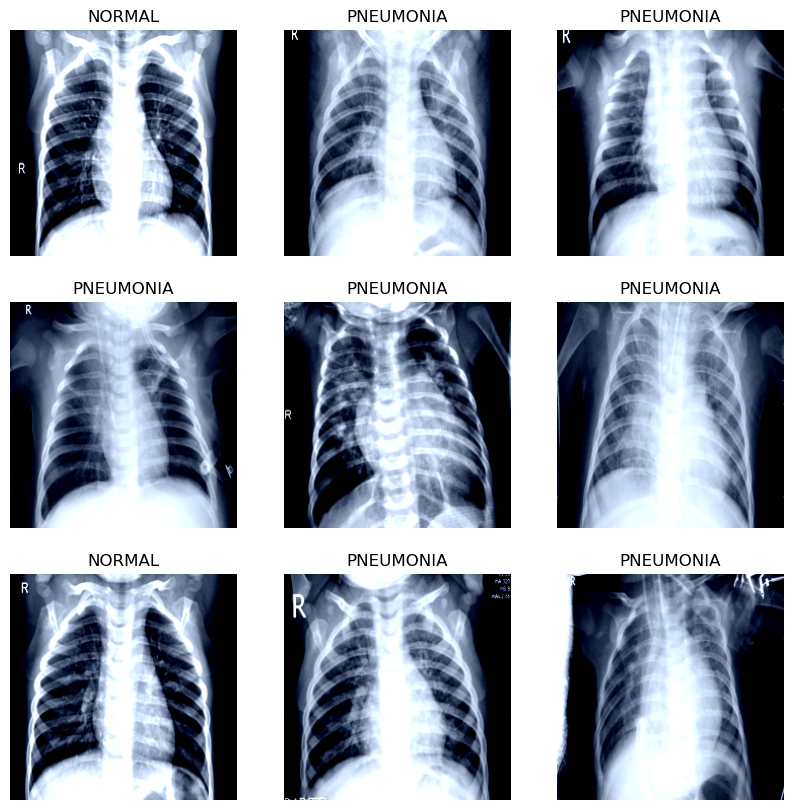


Bacterial Pneumonia  (3 samples):


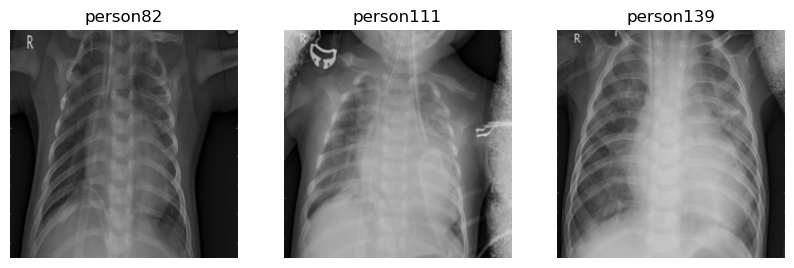


 Viral Pneumonia  (3 samples):


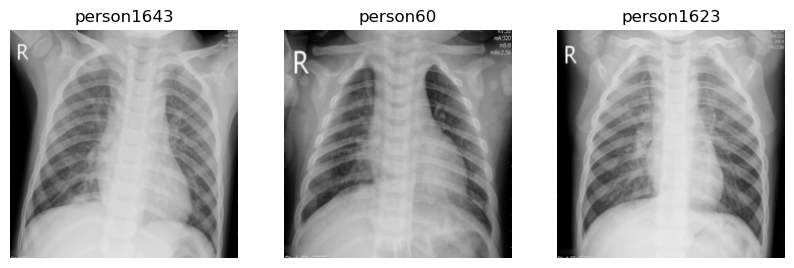

In [57]:


print("Validation Dataset:")
show_random_images(val_dataset, val_dataset.classes)
show_class_images(val_dataset, 'PNEUMONIA', num_images=3)

print("Test Dataset:")
show_random_images(test_dataset, test_dataset.classes)
show_class_images(test_dataset, 'PNEUMONIA', num_images=3)


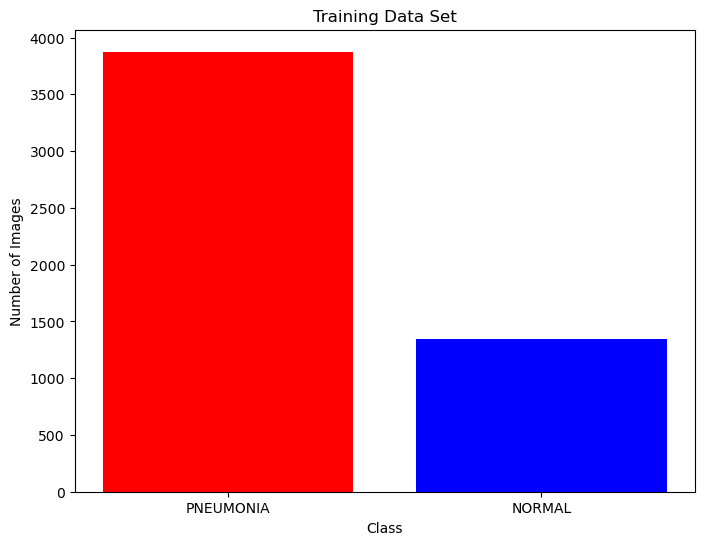

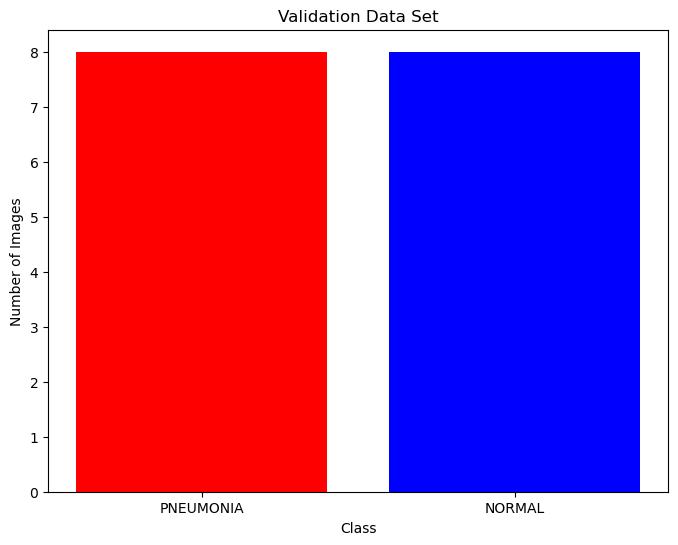

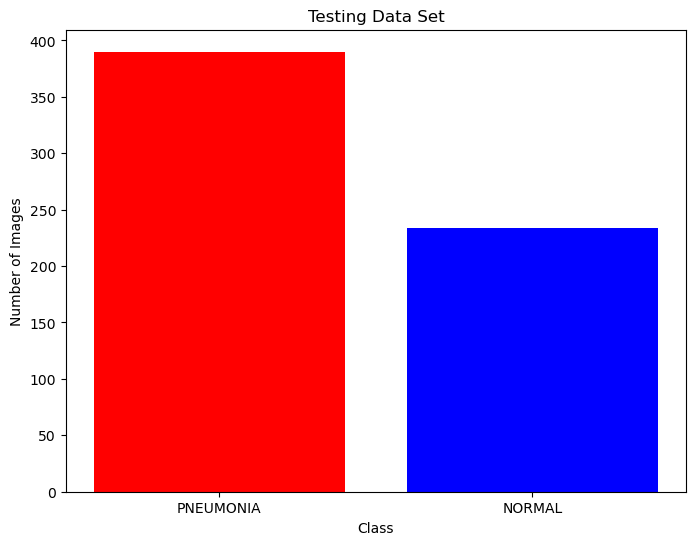

In [59]:

def class_distribution (dataset_path,dataset_type):

    classes = ['PNEUMONIA', 'NORMAL']
    counts = [len(os.listdir(os.path.join(dataset_path, cls))) for cls in classes]

    plt.figure(figsize=(8, 6))
    plt.bar(classes, counts, color=['red', 'blue'])
    plt.title(f"{dataset_type} Data Set")
    plt.xlabel("Class")
    plt.ylabel("Number of Images")
    plt.show()


class_distribution(train_data, "Training")
class_distribution(val_data, "Validation")
class_distribution(test_data, "Testing")


In [61]:


transform = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),         
        transforms.RandomHorizontalFlip(),      
        transforms.RandomRotation(10),         
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2), 
        transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),  
        transforms.ToTensor(),                  
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  
    ]),
    'val': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
}

train_dataset = datasets.ImageFolder(r"C:\Users\yigit\Downloads\archive(16)\chest_xray\train", transform=transform['train'])
val_dataset = datasets.ImageFolder(r"C:\Users\yigit\Downloads\archive(16)\chest_xray\val", transform=transform['val'])
test_dataset = datasets.ImageFolder(r"C:\Users\yigit\Downloads\archive(16)\chest_xray\test", transform=transform['test'])





train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)



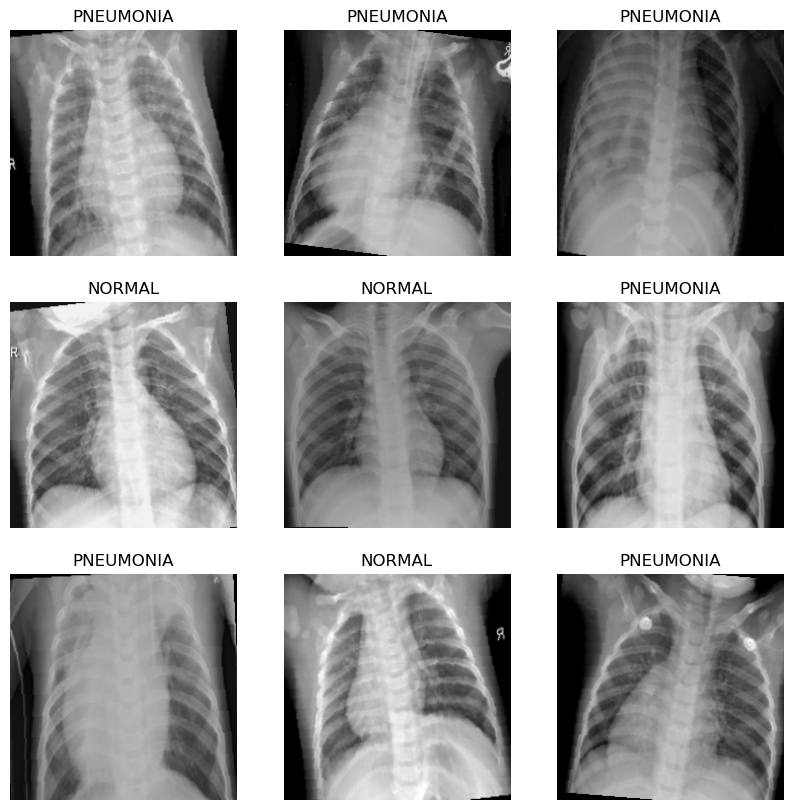

In [63]:

class_names = train_dataset.classes 


def show_augmented_images(loader, class_names):
    images, labels = next(iter(loader))  
    plt.figure(figsize=(10, 10))

    for i in range(9): 
        ax = plt.subplot(3, 3, i + 1)
        img = images[i].numpy().transpose((1, 2, 0))  
      
        img = np.clip(img * [0.229, 0.224, 0.225] + [0.485, 0.456, 0.406], 0, 1)  
        plt.imshow(img)
        plt.title(class_names[labels[i]])
        plt.axis('off')

    plt.show()


show_augmented_images(train_loader, class_names)

In [65]:

model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V1)


for param in model.parameters():
    param.requires_grad = False


for param in model.layer3.parameters():
    param.requires_grad = True


model.fc = nn.Sequential(
    nn.Linear(model.fc.in_features, 512),  
    nn.ReLU(),
    nn.Dropout(0.5),                       
    nn.Linear(512, 1),                     
                            
)


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

In [67]:
from sklearn.utils.class_weight import compute_class_weight
import torch


class_names = train_dataset.classes  


class_labels = [label for _, label in train_dataset.imgs]  


class_weights = compute_class_weight('balanced', classes=np.unique(class_labels), y=class_labels)


class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)


criterion = nn.BCEWithLogitsLoss(pos_weight=class_weights[1])  


optimizer = optim.Adam(model.fc.parameters(), lr=0.001 ,weight_decay=1e-4)

In [69]:
epochs = 50  



from torch.optim.lr_scheduler import ReduceLROnPlateau


scheduler = ReduceLROnPlateau(optimizer, mode='min', patience=3, factor=0.1, verbose=True)


best_val_loss = float('inf')
early_stop_patience = 10
epochs_without_improvement = 0

train_losses = []
val_losses = []
val_accuracies = []

for epoch in range(epochs):
   
    model.train()  
    running_train_loss = 0.0
    for inputs, labels in train_loader:
        
        inputs, labels = inputs.to(device), labels.to(device).float().view(-1, 1)

        
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)

        
        loss.backward()
        optimizer.step()

       
        running_train_loss += loss.item()

    
    train_loss = running_train_loss / len(train_loader)
    train_losses.append(train_loss)

   
    model.eval()  
    running_val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad(): 
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device).float().view(-1, 1)
            outputs = model(inputs)
            val_loss = criterion(outputs, labels)
            running_val_loss += val_loss.item()

          
            predicted = (outputs > 0.5).float()
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    
    val_loss = running_val_loss / len(val_loader)
    val_losses.append(val_loss)

    
    val_accuracy = 100 * correct / total
    val_accuracies.append(val_accuracy)

   
    print(f"Epoch {epoch + 1}/{epochs}, Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}, Accuracy: {val_accuracy:.2f}%")

    scheduler.step(val_loss)

  
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_without_improvement = 0
       
        torch.save(model.state_dict(), 'best_model.pth')
    else:
        epochs_without_improvement += 1
        if epochs_without_improvement >= early_stop_patience:
            print("Early stopping triggered")
            break


model.load_state_dict(torch.load('best_model.pth'))

C:\Users\yigit\anaconda3\Lib\site-packages\torch\optim\lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/50, Training Loss: 0.2518, Validation Loss: 0.2521, Accuracy: 93.75%
Epoch 2/50, Training Loss: 0.1849, Validation Loss: 0.1726, Accuracy: 87.50%
Epoch 3/50, Training Loss: 0.1700, Validation Loss: 0.1305, Accuracy: 93.75%
Epoch 4/50, Training Loss: 0.1613, Validation Loss: 0.3785, Accuracy: 81.25%
Epoch 5/50, Training Loss: 0.1554, Validation Loss: 0.1469, Accuracy: 100.00%
Epoch 6/50, Training Loss: 0.1661, Validation Loss: 0.4174, Accuracy: 87.50%
Epoch 7/50, Training Loss: 0.1501, Validation Loss: 0.1661, Accuracy: 93.75%
Epoch 8/50, Training Loss: 0.1361, Validation Loss: 0.2467, Accuracy: 93.75%
Epoch 9/50, Training Loss: 0.1266, Validation Loss: 0.2457, Accuracy: 93.75%
Epoch 10/50, Training Loss: 0.1183, Validation Loss: 0.1807, Accuracy: 93.75%
Epoch 11/50, Training Loss: 0.1270, Validation Loss: 0.2025, Accuracy: 87.50%
Epoch 12/50, Training Loss: 0.1242, Validation Loss: 0.2162, Accuracy: 93.75%
Epoch 13/50, Training Loss: 0.1207, Validation Loss: 0.1954, Accuracy: 9

C:\Users\yigit\AppData\Local\Temp\ipykernel_26404\2434198156.py:87: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pth'))


<All keys matched successfully>

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.77      0.90      0.83       234
   PNEUMONIA       0.93      0.84      0.88       390

    accuracy                           0.86       624
   macro avg       0.85      0.87      0.85       624
weighted avg       0.87      0.86      0.86       624



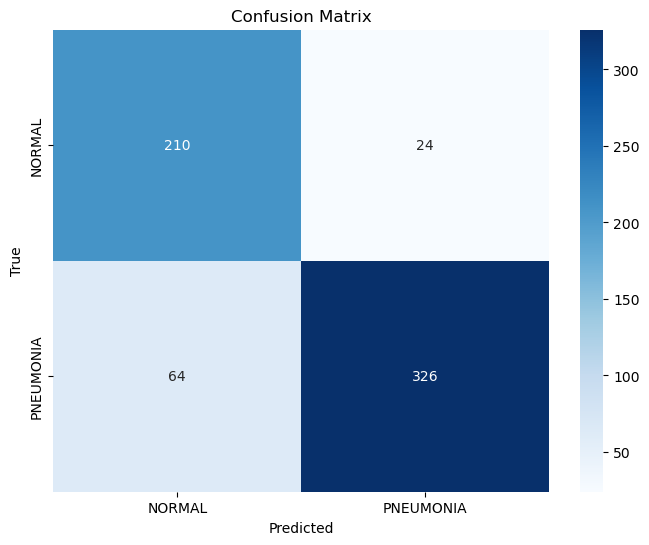

In [71]:

y_true = []
y_pred = []

model.eval()  
with torch.no_grad():  
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device).float().view(-1, 1)

        outputs = model(inputs)
        predicted = (outputs > 0.5).float().cpu().numpy()  
        
        y_pred.extend(predicted)
        y_true.extend(labels.cpu().numpy())  


y_true = np.array(y_true).flatten()
y_pred = np.array(y_pred).flatten()


print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=['NORMAL', 'PNEUMONIA']))


conf_matrix = confusion_matrix(y_true, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['NORMAL', 'PNEUMONIA'], yticklabels=['NORMAL', 'PNEUMONIA'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
